In [57]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
from pyspark.sql.types import StringType
from calendar import weekday
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import folium
import branca

In [2]:
spark = (
    SparkSession.builder.appName("preprocessing of taxi data")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .config("spark.driver.memory", "15g")
    .getOrCreate()
)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/08/23 00:38:32 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/08/23 00:38:33 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
22/08/23 00:38:33 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
22/08/23 00:38:33 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.
22/08/23 00:38:33 WARN Utils: Service 'SparkUI' could not bind on port 4043. Attempting port 4044.
22/08/23 00:38:33 WARN Utils: Service 'SparkUI' could not bind on port 4044. Attempting port 4045.
22/08/23 00:38:33 WARN Utils: Service 'SparkUI' could not bind on port 4045. Attempting port 4046.


In [3]:
visualise_sdf = spark.read.parquet('../data/curated/aggregated')
visualise_weather_sdf = spark.read.parquet('../data/curated/preprocess_weather_result1')
visualise_sdf = visualise_sdf.filter(F.col("date") <= "2016-12-31")
visualise_weather_sdf  = visualise_weather_sdf.filter(F.col("datetime") <= "2016-12-31")

In [4]:
visualise_sdf

PULocationID,date,time_float,average_temperature,time,precip,cos_time,sin_time,date_float,cos_date,sin_date,month_float,cos_month,sin_month,trip_value,holiday,high_value_trips
1,2016-01-26,0.020833334,41.72,00:41:01,0,0.9914449,0.13052619,0.14583333,0.6087614,0.7933533,0.0,1.0,0.0,1.955798,false,1
1,2016-02-11,0.5208333,25.34,12:16:29,0.05,-0.9914449,-0.13052619,0.5029762,-0.9998252,-0.018698849,0.083333336,0.8660254,0.5,2.4046104,false,1
1,2016-03-05,0.8541667,34.43,20:27:33,0,0.6087614,-0.7933533,0.83630955,0.5161063,-0.8565245,0.16666667,0.5,0.8660254,1.701277,false,1
1,2016-03-08,0.6458333,55.67,15:32:14,0,-0.6087614,-0.7933533,0.23511904,0.09336363,0.99563205,0.16666667,0.5,0.8660254,2.4979591,false,1
1,2016-03-10,0.7291667,70.61,17:43:32,0.85,-0.13052619,-0.9914449,0.5327381,-0.9789183,-0.204252,0.16666667,0.5,0.8660254,1.1434395,false,1
1,2016-03-12,0.8125,48.83,19:40:04,0,0.38268343,-0.9238795,0.83035713,0.4837189,-0.8752234,0.16666667,0.5,0.8660254,0.8531446,false,0
1,2016-05-13,0.7291667,61.25,17:31:59,3.54,-0.13052619,-0.9914449,0.6755952,-0.45065495,-0.8926982,0.33333334,-0.5,0.8660254,1.0848972,false,0
1,2016-05-18,0.5208333,59.81,12:31:07,0,-0.9914449,-0.13052619,0.36011904,-0.63800013,0.7700362,0.33333334,-0.5,0.8660254,1.099806,false,0
1,2016-05-25,0.22916667,74.48,05:48:10,0,0.13052619,0.9914449,0.3184524,-0.41696078,0.90892446,0.33333334,-0.5,0.8660254,1.4820632,false,1
1,2016-07-09,0.27083334,68.99000000000001,06:51:07,8.69,-0.13052619,0.9914449,0.7529762,0.018698875,-0.9998252,0.5,-1.0,1.2246469E-16,2.0220973,false,1


In [5]:
total_high_value_sdf = visualise_sdf.groupBy("PULocationID") \
                                    .agg(
                                        {
                                            "high_value_trips": "sum"
                                        }
                                    ) \
                                    .withColumnRenamed('sum(high_value_trips)', 'total_high_value_trips')

In [6]:
total_high_value_sdf

PULocationID,total_high_value_trips
26,242
29,185
65,42871
191,161
222,62
243,7378
19,130
54,1940
112,23252
113,297702


In [7]:
total_high_value_df = total_high_value_sdf.toPandas()
total_high_value_df['total_high_value_trips'] = np.log(total_high_value_df['total_high_value_trips'].replace(0, np.nan))

In [8]:

sf = gpd.read_file("../data/taxi_zones/taxi_zones.shp")
zone = pd.read_csv("../data/taxi_zones/taxi+_zone_lookup.csv")

sf['geometry'] = sf['geometry'].to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")

gdf = gpd.GeoDataFrame(pd.merge(total_high_value_df, sf, left_on='PULocationID', right_on='LocationID')) \
                        .drop('LocationID',axis=1)
geoJSON = gdf[['PULocationID','geometry']].to_json()

In [9]:

m = folium.Map(location=[40.66, -73.94], zoom_start=10, tiles=None)
folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(m)
folium.Choropleth(
    geo_data=geoJSON,
    name="choropleth",
    data=gdf,
    columns=["PULocationID", "total_high_value_trips"],
    key_on="properties.PULocationID",
    fill_color="YlGn",
    fill_opacity=0.9,
    line_opacity=0.4,
    legend_name= "number of high value trips"
).add_to(m)

folium.LayerControl().add_to(m)
fpth = "../plots/" + "total_high_value_trips" + ".html"
print(fpth)
m.save(fpth)

../plots/total_high_value_trips.html


In [10]:
visualise_weather_sdf = visualise_weather_sdf.withColumn("month", F.date_format('datetime', 'MM'))
visualise_summer_df = visualise_weather_sdf.filter((F.col("month") == '07')).toPandas()
visualise_winter_df = visualise_weather_sdf.filter((F.col("month") == '01')).toPandas()


In [11]:
winter_days = []
for date in visualise_winter_df['datetime']:
    winter_days.append(str(date).split()[0])

summer_days = []
for date in visualise_summer_df['datetime']:
    summer_days.append(str(date).split()[0])

/var/folders/mk/5m0_ggk577s5d_q78b0zrg540000gn/T/ipykernel_55374/3139214241.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(x, y, Marker='o')


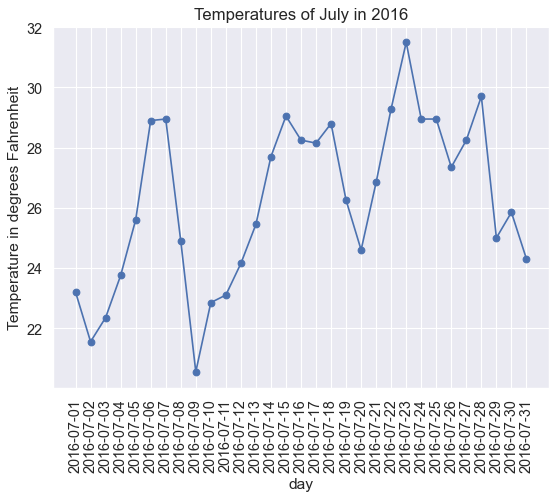

In [62]:
figure(figsize=(8, 6), dpi=80)
visualise_summer_df['datetime'] = pd.to_datetime(visualise_summer_df['datetime']) 
x = visualise_summer_df['datetime']
y = visualise_summer_df['average_temperature']
title = "Temperatures of July in 2016"
plt.title(title, fontsize=15)
plt.grid(b=True)
plt.ylabel("Temperature in degrees Fahrenheit", fontsize=14)
plt.xlabel("day", fontsize=14)
plt.xticks(x, summer_days, fontsize=8, rotation='vertical')
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.plot(x, y, Marker='o')
plt.savefig("../plots/temp_july.png", bbox_inches = "tight")

/var/folders/mk/5m0_ggk577s5d_q78b0zrg540000gn/T/ipykernel_55374/2853526724.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(x, y, Marker='o')


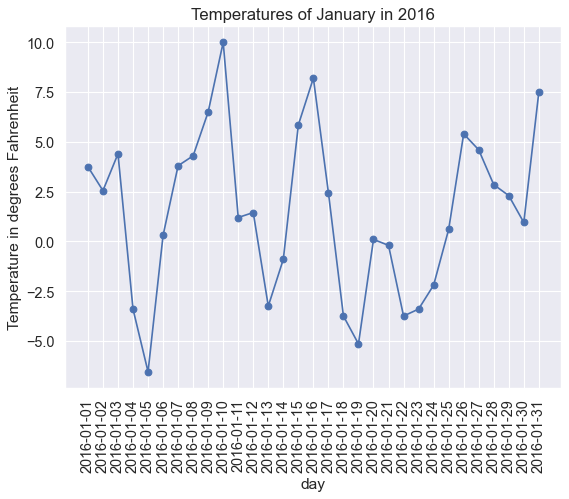

In [63]:
figure(figsize=(8, 6), dpi=80)
visualise_winter_df['datetime'] = pd.to_datetime(visualise_winter_df['datetime']) 
x = visualise_winter_df['datetime']
y = visualise_winter_df['average_temperature']
title = "Temperatures of January in 2016"
plt.title(title, fontsize=15)
plt.grid(b=True)
plt.ylabel("Temperature in degrees Fahrenheit", fontsize=14)
plt.xlabel("day", fontsize=14)
plt.xticks(x, winter_days, fontsize=8, rotation='vertical')
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.plot(x, y, Marker='o')
plt.savefig("../plots/temp_jan.png", bbox_inches = "tight")

/var/folders/mk/5m0_ggk577s5d_q78b0zrg540000gn/T/ipykernel_55374/2335502700.py:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(x, y, Marker='o')


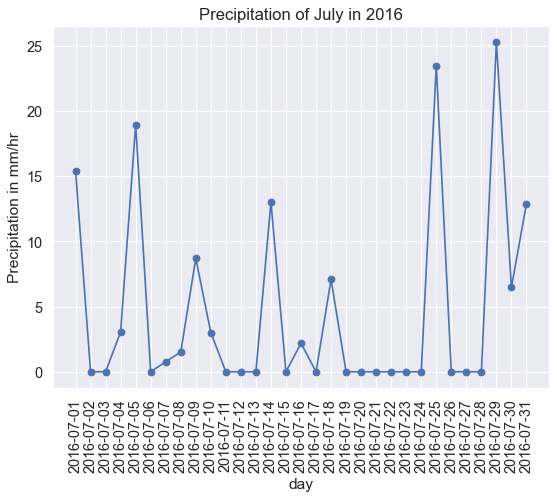

In [64]:
figure(figsize=(8, 6), dpi=80)
visualise_summer_df['precip'] = pd.to_numeric(visualise_summer_df['precip'], errors='coerce')
x = visualise_summer_df['datetime']
y = visualise_summer_df['precip']
plt.title("Precipitation of July in 2016", fontsize=15)
plt.grid(b=True)
plt.ylabel("Precipitation in mm/hr", fontsize=14)
plt.xlabel("day", fontsize=14)
plt.xticks(x, summer_days, fontsize=8, rotation='vertical')
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.plot(x, y, Marker='o')
plt.savefig("../plots/precip_july.png", bbox_inches = "tight")

/var/folders/mk/5m0_ggk577s5d_q78b0zrg540000gn/T/ipykernel_55374/3893765475.py:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(x, y, Marker='o')


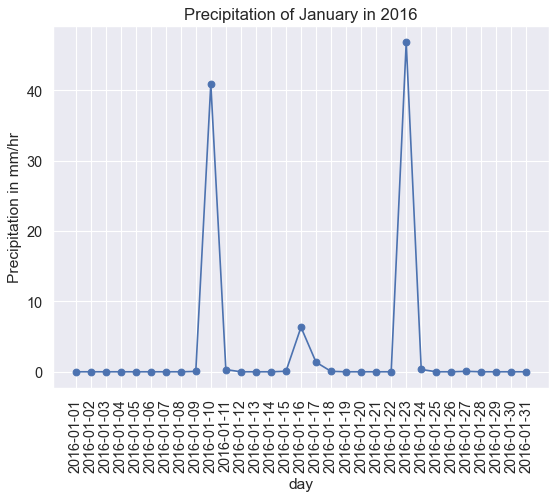

In [65]:
figure(figsize=(8, 6), dpi=80)
visualise_winter_df['precip'] = pd.to_numeric(visualise_winter_df['precip'], errors='coerce')
x = visualise_winter_df['datetime']
y = visualise_winter_df['precip']
plt.title("Precipitation of January in 2016", fontsize=15)
plt.grid(b=True)
plt.ylabel("Precipitation in mm/hr", fontsize=14)
plt.xlabel("day", fontsize=14)
plt.xticks(x, winter_days, fontsize=8, rotation='vertical')
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.plot(x, y, Marker='o')
plt.savefig("../plots/precip_jan.png", bbox_inches = "tight")

In [16]:
visualise_day_pickups_sdf = visualise_sdf.withColumn("month_date", F.date_format('date', 'MM-dd'))


In [17]:
visualise_day_pickups_sdf = visualise_day_pickups_sdf.groupBy("month_date") \
                                                     .agg(
                                                         {
                                                             "high_value_trips": "sum",
                                                             "date": "first"
                                                        }
                                                     ) \
                                                     .withColumnRenamed('sum(high_value_trips)', 'total_high_value_trips') \
                                                     .withColumnRenamed('first(date)', 'date')
visualise_day_pickups_sdf

month_date,date,total_high_value_trips
05-25,2016-05-25,55613
07-26,2016-07-26,54547
09-17,2016-09-17,48484
02-29,2016-02-29,75901
10-31,2016-10-31,53934
04-13,2016-04-13,62729
05-09,2016-05-09,64580
09-02,2016-09-02,49565
09-08,2016-09-08,46772
11-07,2016-11-07,50251


In [18]:
visualise_winter_pickup_df = visualise_day_pickups_sdf.filter(F.col("month_date") <= "01-31").toPandas()
visualise_summer_pickup_df = visualise_day_pickups_sdf.filter((F.col("month_date") <= "07-31") & 
                                                              (F.col("month_date") >= "07-01")).toPandas()
visualise_summer_pickup_df = visualise_summer_pickup_df.sort_values(by=['date'])
visualise_winter_pickup_df = visualise_winter_pickup_df.sort_values(by=['date'])

/var/folders/mk/5m0_ggk577s5d_q78b0zrg540000gn/T/ipykernel_55374/1066203548.py:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(x, y, Marker='o')


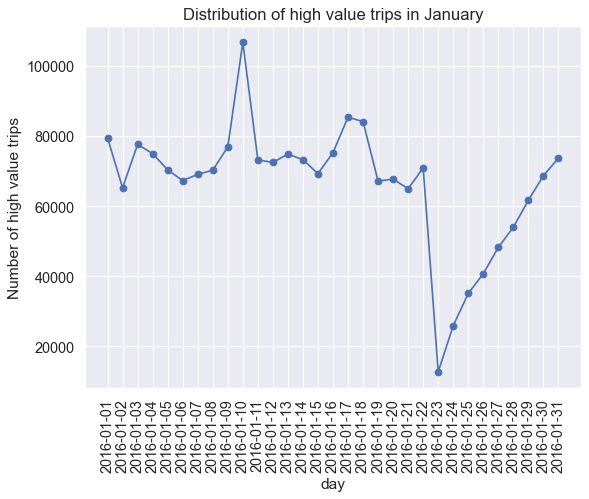

In [67]:
figure(figsize=(8, 6), dpi=80)
visualise_winter_pickup_df['date'] = pd.to_datetime(visualise_winter_pickup_df['date']) 
x = visualise_winter_pickup_df['date']
y = visualise_winter_pickup_df['total_high_value_trips']
plt.title("Distribution of high value trips in January", fontsize=15)
plt.grid(b=True)
plt.ylabel("Number of high value trips", fontsize=14)
plt.xlabel("day", fontsize=14)
plt.xticks(x, winter_days, fontsize=8, rotation='vertical')
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.plot(x, y, Marker='o')
plt.savefig("../plots/pickup_jan.png", bbox_inches = "tight")

/var/folders/mk/5m0_ggk577s5d_q78b0zrg540000gn/T/ipykernel_55374/3843830161.py:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(x, y, Marker='o')


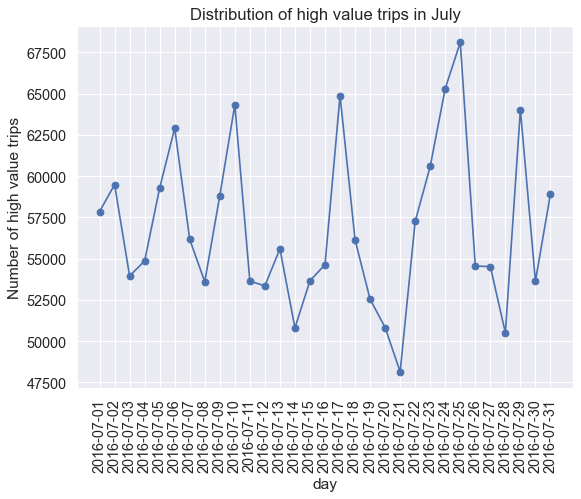

In [68]:
figure(figsize=(8, 6), dpi=80)
visualise_summer_pickup_df['date'] = pd.to_datetime(visualise_summer_pickup_df['date']) 
x = visualise_summer_pickup_df['date']
y = visualise_summer_pickup_df['total_high_value_trips']
plt.title("Distribution of high value trips in July", fontsize=15)
plt.grid(b=True)
plt.ylabel("Number of high value trips", fontsize=14)
plt.xlabel("day", fontsize=14)
plt.xticks(x, summer_days, fontsize=8, rotation='vertical')
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.plot(x, y, Marker='o')
plt.savefig("../plots/pickup_july.png", bbox_inches = "tight")

In [21]:
visualise_day_pickups_sdf

month_date,date,total_high_value_trips
05-25,2016-05-25,55613
07-26,2016-07-26,54547
09-17,2016-09-17,48484
02-29,2016-02-29,75901
10-31,2016-10-31,53934
04-13,2016-04-13,62729
05-09,2016-05-09,64580
09-02,2016-09-02,49565
09-08,2016-09-08,46772
11-07,2016-11-07,50251


In [22]:
visualise_month_pickups_sdf = visualise_sdf.withColumn("month", F.date_format('date', 'MM'))

In [23]:
visualise_month_pickups_sdf = visualise_month_pickups_sdf.groupBy("month") \
                                                     .agg(
                                                         {
                                                             "high_value_trips": "sum",
                                                             "date": "first"
                                                        }
                                                     ) \
                                                     .withColumnRenamed('sum(high_value_trips)', 'total_high_value_trips') \
                                                     .withColumnRenamed('first(date)', 'date')
visualise_month_pickups_df = visualise_month_pickups_sdf.toPandas()

In [24]:
visualise_month_pickups_df

,month,date,total_high_value_trips
0,07,2016-07-09,1762843
1,11,2016-11-13,1569550
2,01,2016-01-26,2057229
3,09,2016-09-17,1538104
4,05,2016-05-13,1973952
5,08,2016-08-17,1649119
6,03,2016-03-05,2209351
7,02,2016-02-11,2132669
8,06,2016-06-10,1798280
9,10,2016-10-09,1717022


/var/folders/mk/5m0_ggk577s5d_q78b0zrg540000gn/T/ipykernel_55374/2181194084.py:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(x, y, Marker='o')


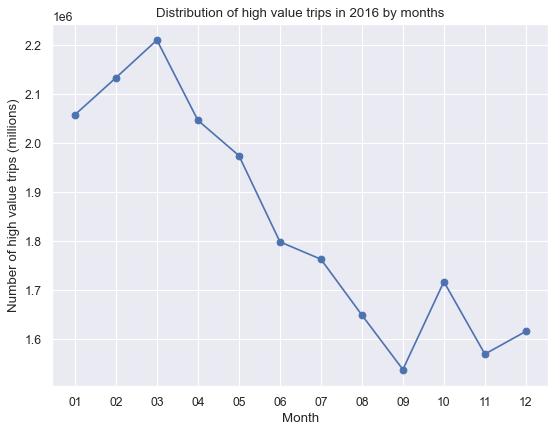

In [55]:
figure(figsize=(8, 6), dpi=80)
visualise_month_pickups_df = visualise_month_pickups_df.sort_values(by=['month'])
x = visualise_month_pickups_df['month']
y = visualise_month_pickups_df['total_high_value_trips']
plt.title("Distribution of high value trips in 2016 by months")
plt.grid(b=True)
plt.ylabel("Number of high value trips (millions)")
plt.xlabel("Month")
plt.plot(x, y, Marker='o')
plt.savefig("../plots/pickup_HV_month.png", bbox_inches = "tight")

In [42]:
visualise_sdf

PULocationID,date,time_float,average_temperature,time,precip,cos_time,sin_time,date_float,cos_date,sin_date,month_float,cos_month,sin_month,trip_value,holiday,high_value_trips
1,2016-01-26,0.020833334,41.72,00:41:01,0,0.9914449,0.13052619,0.14583333,0.6087614,0.7933533,0.0,1.0,0.0,1.955798,false,1
1,2016-02-11,0.5208333,25.34,12:16:29,0.05,-0.9914449,-0.13052619,0.5029762,-0.9998252,-0.018698849,0.083333336,0.8660254,0.5,2.4046104,false,1
1,2016-03-05,0.8541667,34.43,20:27:33,0,0.6087614,-0.7933533,0.83630955,0.5161063,-0.8565245,0.16666667,0.5,0.8660254,1.701277,false,1
1,2016-03-08,0.6458333,55.67,15:32:14,0,-0.6087614,-0.7933533,0.23511904,0.09336363,0.99563205,0.16666667,0.5,0.8660254,2.4979591,false,1
1,2016-03-10,0.7291667,70.61,17:43:32,0.85,-0.13052619,-0.9914449,0.5327381,-0.9789183,-0.204252,0.16666667,0.5,0.8660254,1.1434395,false,1
1,2016-03-12,0.8125,48.83,19:40:04,0,0.38268343,-0.9238795,0.83035713,0.4837189,-0.8752234,0.16666667,0.5,0.8660254,0.8531446,false,0
1,2016-05-13,0.7291667,61.25,17:31:59,3.54,-0.13052619,-0.9914449,0.6755952,-0.45065495,-0.8926982,0.33333334,-0.5,0.8660254,1.0848972,false,0
1,2016-05-18,0.5208333,59.81,12:31:07,0,-0.9914449,-0.13052619,0.36011904,-0.63800013,0.7700362,0.33333334,-0.5,0.8660254,1.099806,false,0
1,2016-05-25,0.22916667,74.48,05:48:10,0,0.13052619,0.9914449,0.3184524,-0.41696078,0.90892446,0.33333334,-0.5,0.8660254,1.4820632,false,1
1,2016-07-09,0.27083334,68.99000000000001,06:51:07,8.69,-0.13052619,0.9914449,0.7529762,0.018698875,-0.9998252,0.5,-1.0,1.2246469E-16,2.0220973,false,1


In [48]:
@F.udf(returnType=StringType())
def covert_day(date):
    date = str(date)
    year, month, day = date.split('-')
    day_int = weekday(int(year), int(month), int(day))
    day_to_str = {0: "Monday",
                  1: "Tuesday",
                  2: "Wednesday",
                  3: "Thursday",
                  4: "Friday",
                  5: "Saturday",
                  6: "Sunday"}
    return day_to_str[day_int]



visualise_day_time_HV_pickups_sdf = visualise_sdf.withColumn("day_of_week", covert_day(F.col("date")))
visualise_day_time_HV_pickups_sdf = visualise_day_time_HV_pickups_sdf.groupBy("day_of_week", "time_float") \
                                                                     .agg(
                                                                         {
                                                                             "high_value_trips": "sum",
                                                                             "time" : "first"
                                                                        }
                                                                     ) \
                                                                     .withColumnRenamed('sum(high_value_trips)', 'high_value_trips') \
                                                                     .withColumnRenamed('first(time)', 'time')
visualise_day_time_HV_pickups_sdf

day_of_week,time_float,high_value_trips,time
Friday,0.020833334,196436,00:12:09
Friday,0.0625,154880,01:33:59
Friday,0.104166664,112342,02:43:20
Friday,0.14583333,78411,03:38:30
Friday,0.1875,72912,04:22:28
Friday,0.22916667,103715,05:25:42
Friday,0.27083334,163823,06:42:01
Friday,0.3125,146108,07:07:14
Friday,0.35416666,109401,08:02:29
Friday,0.39583334,93744,09:45:24


In [49]:
@F.udf(returnType=StringType())
def gethour(time):
    hour, min, sec = time.split(':')
    return f'{hour}:00'
visualise_day_time_HV_pickups_sdf = visualise_day_time_HV_pickups_sdf.withColumn('time', gethour(F.col('time')))
visualise_day_time_HV_pickups_sdf

day_of_week,time_float,high_value_trips,time
Friday,0.020833334,196436,00:00
Friday,0.0625,154880,01:00
Friday,0.104166664,112342,02:00
Friday,0.14583333,78411,03:00
Friday,0.1875,72912,04:00
Friday,0.22916667,103715,05:00
Friday,0.27083334,163823,06:00
Friday,0.3125,146108,07:00
Friday,0.35416666,109401,08:00
Friday,0.39583334,93744,09:00


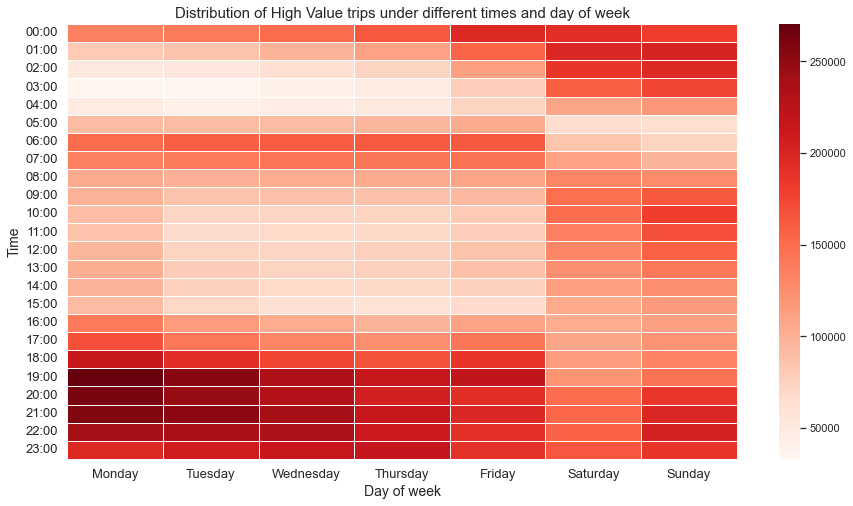

In [58]:
WEEK_NAMES = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
visualise_day_time_HV_pickups_df = visualise_day_time_HV_pickups_sdf.toPandas()
visualise_day_time_HV_pickups_df['day_of_week'] = pd.Categorical(visualise_day_time_HV_pickups_df['day_of_week'], 
                                                                 categories=WEEK_NAMES)
visualise_day_time_HV_pickups_df = visualise_day_time_HV_pickups_df.sort_values(['day_of_week', 'time_float'])            
plot_df = pd.pivot_table(visualise_day_time_HV_pickups_df, index='time', columns='day_of_week', values='high_value_trips', aggfunc=np.sum)

sns.set(rc = {'figure.figsize':(15,8)})
plot = sns.heatmap(plot_df, xticklabels=True, yticklabels=True, linewidths=.5, cmap="Reds")
plot.set_xlabel("Day of week", fontsize=14)
plot.set_ylabel("Time", fontsize=14)
plot.set_title("Distribution of High Value trips under different times and day of week", fontsize=15)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.savefig("../plots/HV_pickup_heatmap.png", bbox_inches = "tight")